<a id='top'></a>

<center><h1>ggplot2 Cookbook</h1></center>

- [Line Chart - geom_line](#line_chart)
- [Bar Chart - geom_bar](#bar_chart)
- [Changing x-axis datetime scale](#x_scale)
- [Change x or y scales](#changing_scales)

In [1]:
%load_ext rpy2.ipython

In [ ]:
from IPython.html.widgets import interact, interactive
from IPython.html import widgets
from IPython.display import display
import pandas.io.data as web
from datetime import datetime
import pandas as pd

In [108]:
def f(x):
    stocks = {'Tech':['GOOGL', 'MSFT', 'LNKD', 'YHOO', 'FB','HPQ','AMZN'],
              'Auto':['TM','F','GM','HMC','NSANY','HYMTF'],
              'Housing':['HD','LOW','WMT']
             }
    return stocks[x]

str_start_date = input("Enter start date in YYYY-mm-dd format: ")
str_end_date   = input("Enter end date in YYYY-mm-dd format: ")

start_date = datetime(int(str_start_date[:4]), int(str_start_date[5:7]), int(str_start_date[8:10]))
end_date   = datetime(int(str_end_date[:4]), int(str_end_date[5:7]), int(str_end_date[8:10]))

Enter start date in YYYY-mm-dd format: 2014-07-01
Enter end date in YYYY-mm-dd format: 2015-03-01


In [93]:
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

w = interactive(f, x=('Tech','Auto','Housing'))

display(w)

### After selecting stock type, then execute all cells below this cell (Cell -> Run All Below):

In [117]:
df = pd.DataFrame({n: get_px(n, start_date, end_date) for n in w.result})
df.reset_index(level=0, inplace=True)

df = pd.melt(df, id_vars=['Date']).dropna()
df = df.rename(columns = {'Date':'Date','variable':'Stock','value':'Adj_Close'})

In [118]:
%R -i df

<a id='line_chart'></a>

### Line chart - geom_line

[[back to top](#top)]

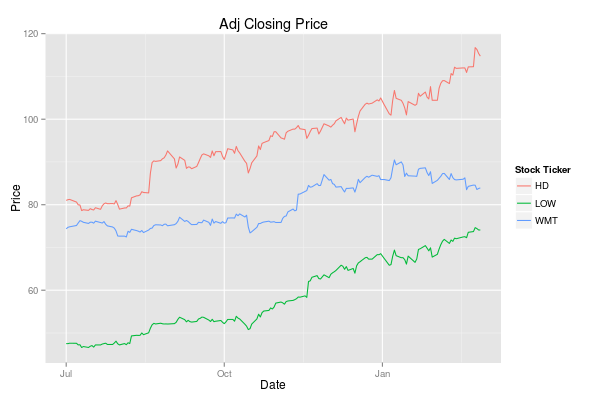

In [119]:
%%R -w 600 -h 400 -u px # Set size of chart.  Instead of px, you can also choose 'in', 'cm', or 'mm'
df = as.data.frame(df)  # ensure dataframe that was passed in from Python will be R's dataframe type
library(ggplot2)
p = ggplot(df, aes(df$Date, df$Adj_Close, color=df$Stock))
p = p + 
    geom_line() +
    ggtitle("Adj Closing Price") +
    xlab("Date") +
    ylab("Price") +
    scale_color_discrete(name = "Stock Ticker")  # Renaming legend title with line chart
print(p)

<a id='bar_chart'></a>

### Bar chart - geom_bar

[[back to top](#top)]

#### If you don't want the bars to be stacked, used position="dodge" option; if you want them stacked then leave it out.

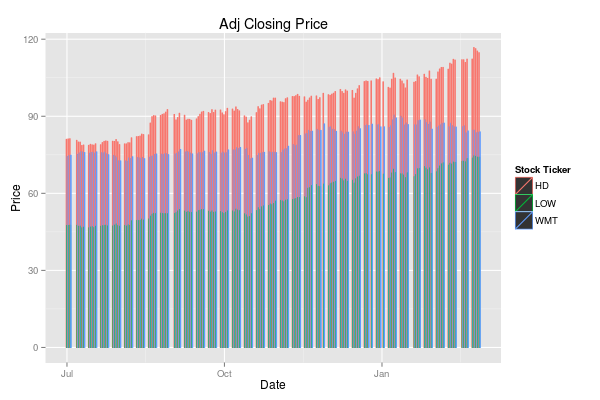

In [120]:
%%R -w 600 -h 400 -u px # Set size of chart.  Instead of px, you can also choose 'in', 'cm', or 'mm'
df = as.data.frame(df)  # ensure dataframe that was passed in from Python will be R's dataframe type
library(ggplot2)
p = ggplot(df, aes(df$Date, df$Adj_Close, color=df$Stock))
p = p + 
    geom_bar(stat="identity", position="dodge") +
    ggtitle("Adj Closing Price") +
    xlab("Date") +
    ylab("Price") +
    scale_color_discrete(name = "Stock Ticker")  # Renaming legend title with bar chart
print(p)

<a id='x_scale'></a>

### Changing the x-axis datetime scale

[[back to top](#top)]

#### Need to first import the "scales" package - library(scales).  Click [here](http://strftime.org/) for date format strings.

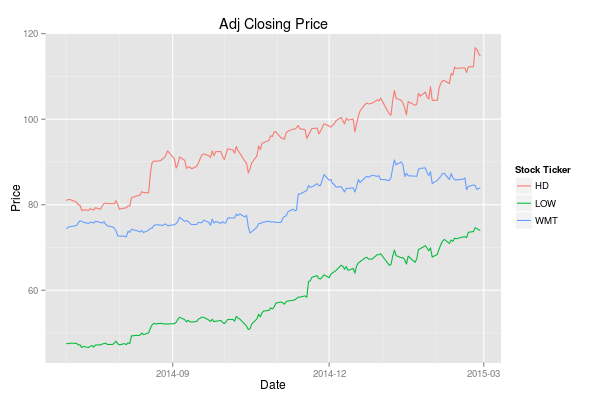

In [121]:
%%R -w 600 -h 400 -u px # Set size of chart.  Instead of px, you can also choose 'in', 'cm', or 'mm'
df = as.data.frame(df)  # ensure dataframe that was passed in from Python will be R's dataframe type
library(ggplot2)
library(scales)         # Need to import this to change datetime x-scale

p = ggplot(df, aes(df$Date, df$Adj_Close, color=df$Stock))
p = p + 
    geom_line() +
    ggtitle("Adj Closing Price") +
    xlab("Date") +
    ylab("Price") +
    scale_x_datetime(labels=date_format("%Y-%m"), breaks="3 months", minor_breaks="1 month") +
    scale_color_discrete(name = "Stock Ticker")  # Renaming legend title with line chart
print(p)

<a id='changing_scales'></a>

### Change x or y scales - see [docs](http://docs.ggplot2.org/current/scale_continuous.html)

[[back to top](#top)]

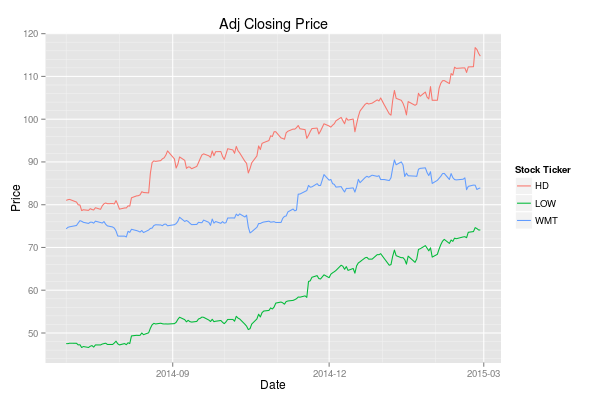

In [132]:
%%R -w 600 -h 400 -u px # Set size of chart.  Instead of px, you can also choose 'in', 'cm', or 'mm'
df = as.data.frame(df)  # ensure dataframe that was passed in from Python will be R's dataframe type
library(ggplot2)
library(scales)         # Need to import this to change datetime x-scale

p = ggplot(df, aes(df$Date, df$Adj_Close, color=df$Stock))
p = p + 
    geom_line() +
    ggtitle("Adj Closing Price") +
    xlab("Date") +
    ylab("Price") +
    scale_x_datetime(labels=date_format("%Y-%m"), breaks="3 months", minor_breaks="1 month") +
    scale_color_discrete(name = "Stock Ticker") +  # Renaming legend title with line chart
    scale_y_continuous(breaks=seq(0, 120, by=10), minor_breaks=seq(0, 120, by=2))
print(p)